In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
print(pd.__version__ , sns.__version__,np.__version__)

1.4.4 0.12.0 1.23.2


In [313]:
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")
print(train_df.shape,test_df.shape)

(1460, 81) (1459, 80)


In [314]:
combine=[train_df,test_df]
for dataset in combine:
    print(dataset.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [315]:
all_data_na = (train_df.isnull().sum()/len(train_df))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


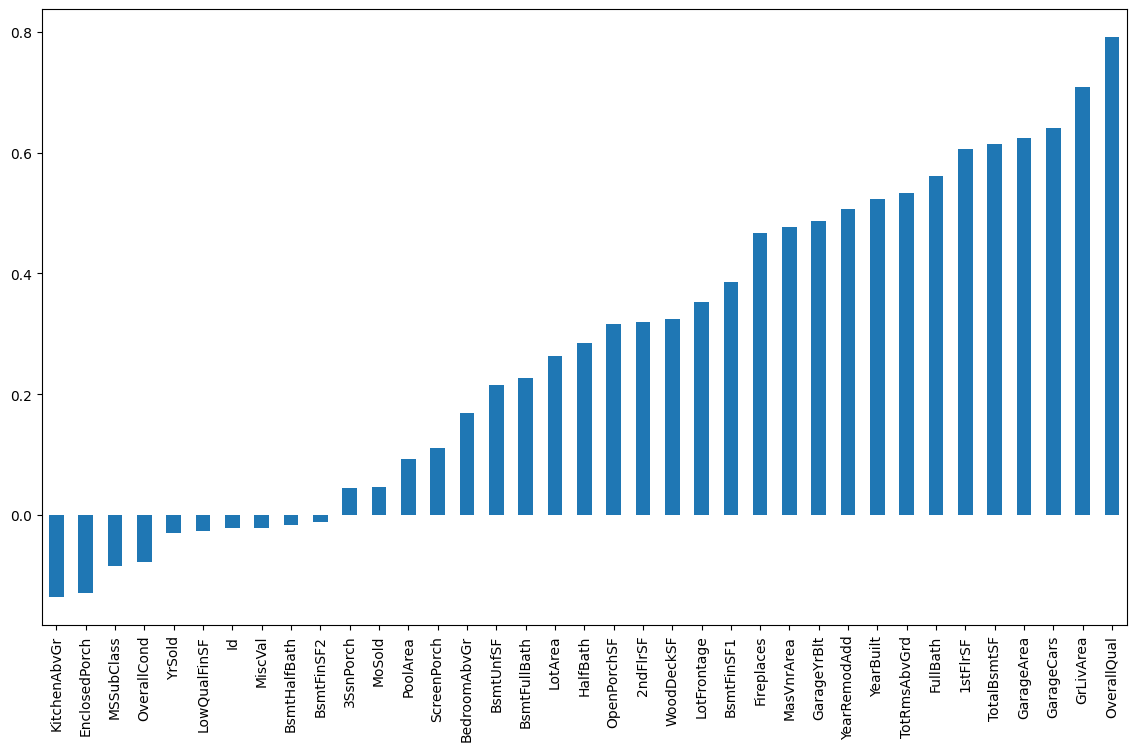

In [316]:
plt.figure(figsize=(14,8))
train_df.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [317]:
train_df[train_df["SalePrice"]>600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [318]:
train_df=train_df.drop(index=[691,898,1169,1182])

In [319]:
train_df=train_df.drop(["PoolQC","Alley","Fence","MiscFeature","FireplaceQu"],axis=1)

In [320]:
test_df=test_df.drop(["PoolQC","Alley","Fence","MiscFeature","FireplaceQu"],axis=1)

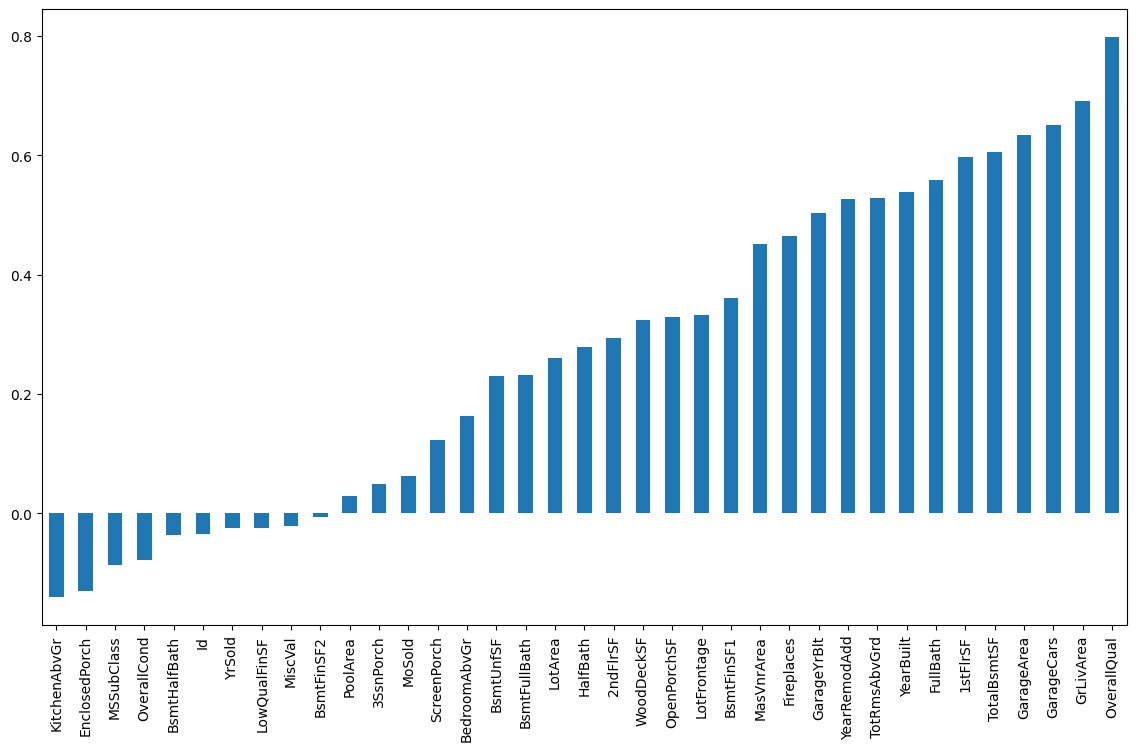

In [321]:
plt.figure(figsize=(14,8))
train_df.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [322]:
all_data_na = (sim.isnull().sum()/len(sim))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data


In [323]:
train_df=train_df.drop(["LotFrontage"],axis=1)

In [324]:
test_df=test_df.drop(["LotFrontage"],axis=1)

C:\Users\KB\AppData\Local\Temp\ipykernel_10068\328497871.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], kde=True, bins=50)


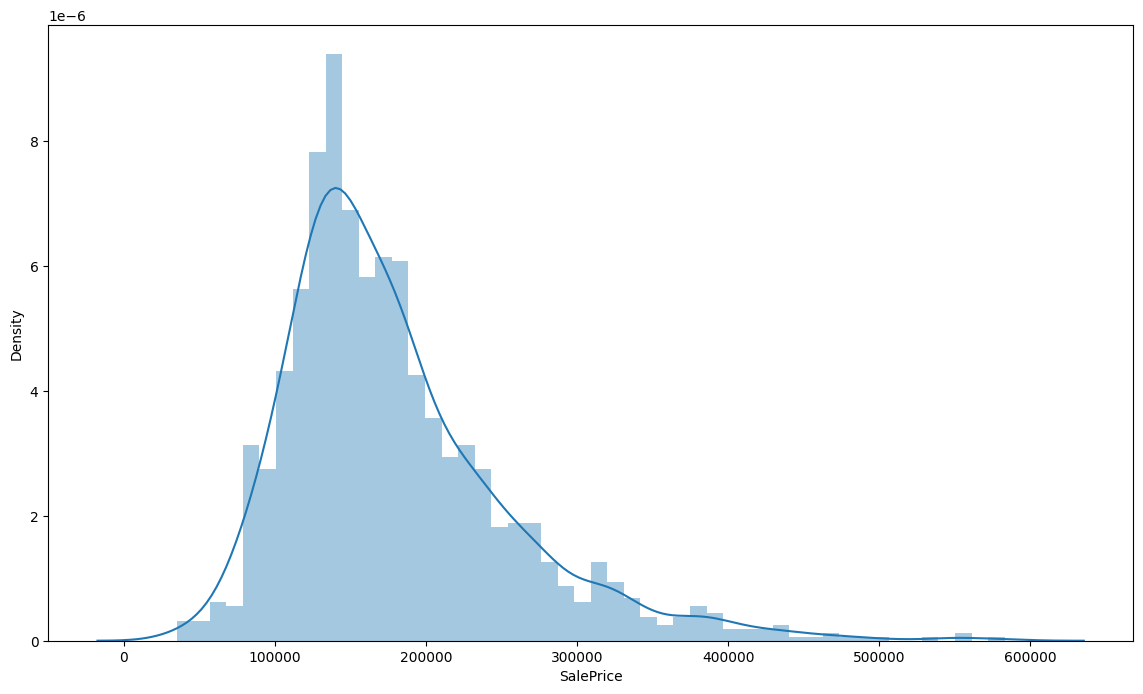

In [325]:
plt.figure(figsize=(14,8))
sns.distplot(train_df['SalePrice'], kde=True, bins=50)
plt.show()

In [326]:
sim=train_df
combine=[sim,test_df]

In [327]:
title_mapping={"EX":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["GarageQual"]=dataset["GarageQual"].map(title_mapping)
    dataset["GarageQual"]=dataset["GarageQual"].fillna(0)
sim[["GarageQual","SalePrice"]].groupby(["GarageQual"],as_index=False).mean()

,GarageQual,SalePrice
0,0.0,108234.523810
1,1.0,100166.666667
2,2.0,123573.354167
3,3.0,185969.791890
4,4.0,215860.714286


In [328]:
title_mapping={"EX":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["GarageCond"]=dataset["GarageCond"].map(title_mapping)
    dataset["GarageCond"]=dataset["GarageCond"].fillna(0)
sim[["GarageCond","SalePrice"]].groupby(["GarageCond"],as_index=False).mean()

,GarageCond,SalePrice
0,0.0,103815.662651
1,1.0,108500.000000
2,2.0,114654.028571
3,3.0,186384.136157
4,4.0,179930.000000


In [329]:
title_mapping={"BuiltIn":8,"Attchd":7,"Basment":5,"2Types" : 4,"Detchd":3, "CarPort" : 1}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["GarageType","SalePrice"]].groupby(["GarageType"],as_index=False).mean()

,GarageType,SalePrice
0,0.0,103317.283951
1,1.0,109962.111111
2,3.0,134091.162791
3,4.0,151283.333333
4,5.0,160570.684211
5,7.0,200669.692841
6,8.0,254751.738636


In [330]:
title_mapping={"Fin":6,"RFn":5,"Unf":3}
for dataset in combine:
    dataset["GarageFinish"]=dataset["GarageFinish"].map(title_mapping)
    dataset["GarageFinish"]=dataset["GarageFinish"].fillna(0)
sim[["GarageFinish","SalePrice"]].groupby(["GarageFinish"],as_index=False).mean()

,GarageFinish,SalePrice
0,0.0,103317.283951
1,3.0,142156.423140
2,5.0,202068.869668
3,6.0,234947.959770


In [331]:
for dataset in combine:
    dataset["Gagagepoint"]=dataset["GarageQual"]+dataset["GarageCond"]+dataset["GarageType"]+dataset["GarageFinish"]
sim[["Gagagepoint","SalePrice"]].groupby(["Gagagepoint"],as_index=False).mean()

,Gagagepoint,SalePrice
0,0.0,103317.283951
1,6.0,127500.000000
2,8.0,98875.000000
3,9.0,166208.428571
4,10.0,112774.458333
5,11.0,125108.466667
6,12.0,133578.825939
7,13.0,150510.000000
8,14.0,155216.214286
9,15.0,142558.263158


In [332]:
title_mapping={"Ex":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["BsmtQual"]=dataset["BsmtQual"].map(title_mapping)
    dataset["BsmtQual"]=dataset["BsmtQual"].fillna(0)
sim[["BsmtQual","SalePrice"]].groupby(["BsmtQual"],as_index=False).mean()

,BsmtQual,SalePrice
0,0.0,105652.891892
1,2.0,115692.028571
2,3.0,140759.818182
3,4.0,202688.478964
4,5.0,314831.700855


In [333]:
title_mapping={"Ex":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["BsmtCond"]=dataset["BsmtCond"].map(title_mapping)
    dataset["BsmtCond"]=dataset["BsmtCond"].fillna(0)
sim[["BsmtCond","SalePrice"]].groupby(["BsmtCond"],as_index=False).mean() 

,BsmtCond,SalePrice
0,0.0,105652.891892
1,1.0,64000.000000
2,2.0,121809.533333
3,3.0,182100.771997
4,4.0,213599.907692


In [334]:
bsm_mapping={"Gd":6,"Av":4, "Mn":3, "No":2}
for dataset in combine:
    dataset["BsmtExposure"]=dataset["BsmtExposure"].map(bsm_mapping)
    dataset["BsmtExposure"]=dataset["BsmtExposure"].fillna(0)
sim[["BsmtExposure","SalePrice"]].groupby(["BsmtExposure"],as_index=False).mean() 

,BsmtExposure,SalePrice
0,0.0,107938.342105
1,2.0,165652.295908
2,3.0,192789.657895
3,4.0,204196.345455
4,6.0,248387.610687


In [335]:
for dataset in combine:
    dataset["Bsmtpoint"]=dataset["BsmtQual"]+dataset["BsmtCond"]+dataset["BsmtExposure"]
sim[["Bsmtpoint","SalePrice"]].groupby(["Bsmtpoint"],as_index=False).mean()

,Bsmtpoint,SalePrice
0,0.0,105652.891892
1,5.0,67000.000000
2,6.0,110625.000000
3,7.0,120981.250000
4,8.0,137007.746421
5,9.0,191110.984655
6,10.0,209800.058065
7,11.0,209409.513514
8,12.0,245149.432836
9,13.0,228451.314286


In [336]:
lotslp_mapping={"Sev":3, "Mod":2, "Gtl":1}
for dataset in combine:
    dataset["LandSlope"]=dataset["LandSlope"].map(lotslp_mapping)
    dataset["LandSlope"]=dataset["LandSlope"].fillna(0)
sim[["LandSlope","SalePrice"]].groupby(["LandSlope"],as_index=False).mean() 

,LandSlope,SalePrice
0,1,178493.207547
1,2,196734.138462
2,3,204379.230769


In [337]:
lotslp_mapping={"NridgHt":7, "StoneBr":7, "NoRidge":7, "Timber":6, "Veenker":6, "Somerst":6, "ClearCr":6, "Crawfor":6, "CollgCr":5, "Blmngtn":5, "Gilbert":5 ,"NWAmes":5, "SawyerW":5, "Mitchel":4 , "NAmes":3, "NPkVill":3, "SWISU":3, "Blueste":3, "Sawyer":3, "OldTown":2, "Edwards":2, "BrkSide":2, "BrDale":1, "IDOTRR":1, "MeadowV":1}
for dataset in combine:
    dataset["Neighborhood"]=dataset["Neighborhood"].map(lotslp_mapping)
    dataset["Neighborhood"]=dataset["Neighborhood"].fillna(0)
sim[["Neighborhood","SalePrice"]].groupby(["Neighborhood"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Neighborhood,SalePrice
6,7,310257.294964
5,6,223870.383178
4,5,193255.619048
3,4,156270.122449
2,3,143469.608955
1,2,127497.431734
0,1,100746.857143


In [338]:
sim=sim.drop(["BsmtQual","BsmtCond","BsmtExposure","Street","LotShape","Utilities"],axis=1)

In [339]:
combine = [sim,test_df]
lotc_mapping={"HLS":4, "Low":3, "Lvl":2, "Bnk":1}
for dataset in combine:
    dataset["LandContour"]=dataset["LandContour"].map(lotc_mapping)
    dataset["LandContour"]=dataset["LandContour"].fillna(0)
sim[["LandContour","SalePrice"]].groupby(["LandContour"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,LandContour,SalePrice
3,4,231533.940000
2,3,203661.111111
1,2,178641.342770
0,1,143104.079365


In [340]:
title_mapping={"CulDSac":7, "FR3":6, "FR2":3, "Corner":4, "Inside":2}
for dataset in combine:
    dataset["LotConfig"]=dataset["LotConfig"].map(title_mapping)
    dataset["LotConfig"]=dataset["LotConfig"].fillna(0)
sim[["LotConfig","SalePrice"]].groupby(["LotConfig"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,LotConfig,SalePrice
4,7,219541.225806
3,6,208475.000000
1,3,177934.574468
2,4,177268.049808
0,2,176524.423406


In [341]:
title_mapping={"Artery":0,"Feedr":2,"Norm":4,"RRNn":6,"RRAn":4,"PosN":6,"PosA":7,"RRNe":5,"RRAe":1}
for dataset in combine:
    dataset["Condition1"]=dataset["Condition1"].map(title_mapping)
    dataset["Condition1"]=dataset["Condition1"].fillna(0)
sim[["Condition1","SalePrice"]].groupby(["Condition1"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Condition1,SalePrice
6,7,225875.000000
5,6,214604.166667
4,5,190750.000000
3,4,182934.457878
2,2,142475.481481
1,1,138400.000000
0,0,135091.666667


In [342]:
title_mapping={"Artery":1,"Feedr":2,"Norm":6,"RRNn":0,"RRAn":3,"PosN":7,"PosA":8,"RRNe":0,"RRAe":5}
for dataset in combine:
    dataset["Condition2"]=dataset["Condition2"].map(title_mapping)
    dataset["Condition2"]=dataset["Condition2"].fillna(0)
sim[["Condition2","SalePrice"]].groupby(["Condition2"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Condition2,SalePrice
7,8,325000.000000
6,7,284875.000000
4,5,190000.000000
5,6,179773.167245
3,3,136905.000000
2,2,121166.666667
1,1,106500.000000
0,0,96750.000000


In [343]:
lotc_mapping={"PConc":6, "Wood":4, "Stone2":3, "CBlockr":2, "BrkTil":1,"Slab":0}
for dataset in combine:
    dataset["Foundation"]=dataset["Foundation"].map(lotc_mapping)
    dataset["Foundation"]=dataset["Foundation"].fillna(0)
sim[["Foundation","SalePrice"]].groupby(["Foundation"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Foundation,SalePrice
3,6.0,222375.488336
2,4.0,185666.666667
0,0.0,148417.700301
1,1.0,132291.075342


In [344]:
title_mapping={"Stone":6, "BrkFace":5, "None":3, "BrkCmn":3}
for dataset in combine:
    dataset["MasVnrType"]=dataset["MasVnrType"].map(title_mapping)
    dataset["MasVnrType"]=dataset["MasVnrType"].fillna(0)
    dataset["MasVnrArea"]=dataset["MasVnrArea"].fillna(0)
sim[["MasVnrType","SalePrice"]].groupby(["MasVnrType"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,MasVnrType,SalePrice
3,6.0,262858.637795
0,0.0,236484.250000
2,5.0,202500.864560
1,3.0,155382.101367


In [345]:
for dataset in combine:
    dataset["MasVnr"]=dataset["MasVnrArea"]*(dataset["MasVnrType"]*0.3)
sim[["MasVnr","SalePrice"]].groupby(["MasVnr"],as_index=False).mean()

,MasVnr,SalePrice
0,0.0,156616.665899
1,0.9,152250.000000
2,16.5,160200.000000
3,21.0,191000.000000
4,24.0,178605.833333
...,...,...
387,1548.0,485000.000000
388,1570.5,159950.000000
389,1672.5,244000.000000
390,1693.5,176000.000000


In [346]:
title_mapping={"Ex":4, "Gd":3, "TA":2, "Fa":1}
for dataset in combine:
    dataset["ExterQual"]=dataset["ExterQual"].map(title_mapping)
    dataset["ExterQual"]=dataset["ExterQual"].fillna(0)
sim[["ExterQual","SalePrice"]].groupby(["ExterQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,ExterQual,SalePrice
3,4,354722.260000
2,3,229767.804527
1,2,144341.313466
0,1,87985.214286


In [347]:
title_mapping={"Ex":6, "Gd":5, "TA	":4, "Fa":2,"Po":1}
for dataset in combine:
    dataset["ExterCond"]=dataset["ExterCond"].map(title_mapping)
    dataset["ExterCond"]=dataset["ExterCond"].fillna(0)
sim[["ExterCond","SalePrice"]].groupby(["ExterCond"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,ExterCond,SalePrice
4,6.0,201333.333333
0,0.0,182815.543393
3,5.0,165752.034483
2,2.0,102595.142857
1,1.0,76500.000000


In [348]:
for dataset in combine:
    dataset["Exter"]=dataset["ExterQual"]+(dataset["ExterCond"]*0.3)
sim[["Exter","SalePrice"]].groupby(["Exter"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Exter,SalePrice
8,4.0,362169.847826
11,5.8,325000.000000
10,5.5,250433.333333
5,3.0,230558.590708
9,4.5,219255.000000
6,3.5,146556.250000
2,2.0,145018.487710
7,3.8,139500.000000
4,2.6,113198.363636
0,1.0,106186.625000


In [349]:
combine = [sim,test_df]
title_mapping={"GasA":6, "GasW":5, "OthW":4, "Wall":3,"Grav":2,"Floor":2}
for dataset in combine:
    dataset["Heating"]=dataset["Heating"].map(title_mapping)
    dataset["Heating"]=dataset["Heating"].fillna(0)
sim[["Heating","SalePrice"]].groupby(["Heating"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Heating,SalePrice
4,6,180610.681180
3,5,166632.166667
2,4,125750.000000
1,3,92100.000000
0,2,74925.000000


In [350]:
title_mapping={"Ex":6, "Gd":5, "TA":4, "Fa":2}
for dataset in combine:
    dataset["KitchenQual"]=dataset["KitchenQual"].map(title_mapping)
    dataset["KitchenQual"]=dataset["KitchenQual"].fillna(1)
sim[["KitchenQual","SalePrice"]].groupby(["KitchenQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,KitchenQual,SalePrice
3,6,316946.494845
2,5,211410.239316
1,4,139962.511565
0,2,105565.205128


In [351]:
for dataset in combine:
    dataset["GarageYrBlt"]=dataset["GarageYrBlt"].fillna(0)
sim[["GarageYrBlt","SalePrice"]].groupby(["GarageYrBlt"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,GarageYrBlt,SalePrice
97,2010.0,337874.666667
95,2008.0,306569.034483
96,2009.0,290833.700000
93,2006.0,262001.338983
23,1934.0,249550.000000
...,...,...
16,1927.0,115000.000000
9,1920.0,109992.857143
0,0.0,103317.283951
39,1952.0,101331.000000


In [352]:
for dataset in combine:
    dataset["GarageCars"]=dataset["GarageCars"].fillna(0)
    dataset["GarageArea"]=dataset["GarageArea"].fillna(0)

In [353]:
for dataset in combine:
    dataset["TotalBsmtSF"]=dataset["TotalBsmtSF"].fillna(0)

In [354]:
test_df.describe(include="object")

,MSZoning,Street,LotShape,Utilities,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,PavedDrive,SaleType,SaleCondition
count,1455,1459,1459,1457,1459,1459,1459,1459,1458,1458,1417,1417,1459,1459,1459,1457,1459,1458,1459
unique,5,2,4,1,5,7,6,4,13,15,6,6,5,2,4,7,3,9,6
top,RL,Pave,Reg,AllPub,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,GLQ,Unf,Ex,Y,SBrkr,Typ,Y,WD,Normal
freq,1114,1453,934,1457,1205,745,1169,1442,510,510,431,1237,752,1358,1337,1357,1301,1258,1204


In [355]:
sim.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.798004
Neighborhood     0.704835
ExterQual        0.693246
GrLivArea        0.691034
GarageCars       0.651630
KitchenQual      0.634925
GarageArea       0.634058
TotalBsmtSF      0.605791
1stFlrSF         0.596491
FullBath         0.558121
GarageFinish     0.549166
YearBuilt        0.539240
TotRmsAbvGrd     0.528314
YearRemodAdd     0.526217
Gagagepoint      0.514096
Bsmtpoint        0.512100
Exter            0.510827
GarageType       0.503313
Foundation       0.500378
MasVnr           0.466157
Fireplaces       0.464401
MasVnrArea       0.445564
MasVnrType       0.404258
BsmtFinSF1       0.360712
OpenPorchSF      0.329547
WoodDeckSF       0.324530
2ndFlrSF         0.293729
GarageCond       0.280386
HalfBath         0.279427
GarageQual       0.272500
GarageYrBlt      0.272159
LotArea          0.261000
BsmtFullBath     0.231081
BsmtUnfSF        0.229938
Condition1       0.181969
LandContour      0.170209
BedroomAbvGr     0.162933
Heating          0.123900
ScreenPorch 

In [356]:
sim=sim.drop(["MasVnrType","BsmtFinSF1","OpenPorchSF","WoodDeckSF","2ndFlrSF","GarageCond","HalfBath","GarageQual","LotArea","BsmtFullBath","BsmtUnfSF","Condition1","LandContour",\
"BedroomAbvGr","Heating","ScreenPorch","LotConfig","Condition2","MoSold","LandSlope","3SsnPorch","PoolArea","BsmtFinSF2","MiscVal","LowQualFinSF","YrSold","BsmtHalfBath","OverallCond",\
"ExterCond","MSSubClass","EnclosedPorch","KitchenAbvGr"],axis=1)

In [357]:
test_df=test_df.drop(["MasVnrType","BsmtFinSF1","OpenPorchSF","WoodDeckSF","2ndFlrSF","GarageCond","HalfBath","GarageQual","LotArea","BsmtFullBath","BsmtUnfSF","Condition1","LandContour",\
"BedroomAbvGr","Heating","ScreenPorch","LotConfig","Condition2","MoSold","LandSlope","3SsnPorch","PoolArea","BsmtFinSF2","MiscVal","LowQualFinSF","YrSold","BsmtHalfBath","OverallCond",\
"ExterCond","MSSubClass","EnclosedPorch","KitchenAbvGr"],axis=1)

In [358]:
sim.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual     0.798004
Neighborhood    0.704835
ExterQual       0.693246
GrLivArea       0.691034
GarageCars      0.651630
KitchenQual     0.634925
GarageArea      0.634058
TotalBsmtSF     0.605791
1stFlrSF        0.596491
FullBath        0.558121
GarageFinish    0.549166
YearBuilt       0.539240
TotRmsAbvGrd    0.528314
YearRemodAdd    0.526217
Gagagepoint     0.514096
Bsmtpoint       0.512100
Exter           0.510827
GarageType      0.503313
Foundation      0.500378
MasVnr          0.466157
Fireplaces      0.464401
MasVnrArea      0.445564
GarageYrBlt     0.272159
Id             -0.034198
Name: SalePrice, dtype: float64

In [359]:
sim.shape,test_df.shape

((1456, 41), (1459, 46))

In [360]:
test_df.isna().sum()

Id                0
MSZoning          4
Street            0
LotShape          0
Utilities         2
Neighborhood      0
BldgType          0
HouseStyle        0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrArea        0
ExterQual         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1     42
BsmtFinType2     42
TotalBsmtSF       0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
GrLivArea         0
FullBath          0
KitchenQual       0
TotRmsAbvGrd      0
Functional        2
Fireplaces        0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
PavedDrive        0
SaleType          1
SaleCondition     0
Gagagepoint       0
Bsmtpoint         0
MasVnr            0
Exter             0
dtype: int64

In [361]:
sim.describe(include="object")

,MSZoning,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,PavedDrive,SaleType,SaleCondition
count,1456,1456,1456,1456,1456,1456,1456,1419,1418,1456,1456,1455,1456,1456,1456,1456
unique,5,5,8,6,8,15,16,6,6,5,2,5,7,3,9,6
top,RL,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Unf,Unf,Ex,Y,SBrkr,Typ,Y,WD,Normal
freq,1147,1216,725,1140,1431,514,503,430,1252,737,1361,1330,1356,1336,1264,1196


In [362]:
sim=sim.drop(["MSZoning","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","BsmtFinType1","BsmtFinType2","HeatingQC",\
              "CentralAir","Electrical","Functional","PavedDrive","SaleType","SaleCondition"],axis=1)

In [363]:
test_df=test_df.drop(["MSZoning","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","BsmtFinType1","BsmtFinType2","HeatingQC",\
              "CentralAir","Electrical","Functional","PavedDrive","SaleType","SaleCondition"],axis=1)

In [364]:
test_df=test_df.drop(["Street","LotShape","Utilities"],axis=1) 

In [365]:
test_df=test_df.drop(["BsmtQual","BsmtCond","BsmtExposure"],axis=1)

In [366]:
sim.shape,test_df.shape

((1456, 25), (1459, 24))

In [367]:
sim.isna().sum()

Id              0
Neighborhood    0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
Foundation      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
SalePrice       0
Gagagepoint     0
Bsmtpoint       0
MasVnr          0
Exter           0
dtype: int64

In [368]:
test_df.isna().sum()

Id              0
Neighborhood    0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
Foundation      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
Gagagepoint     0
Bsmtpoint       0
MasVnr          0
Exter           0
dtype: int64

In [369]:
X_train=sim.drop(["SalePrice","Id"],axis=1)
Y_train=sim["SalePrice"]
X_test=test_df.drop("Id",axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1456, 23), (1456,), (1459, 23))

In [370]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_logreg=round(logreg.score(X_train,Y_train)*100,2)

C:\Users\KB\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [371]:
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

1.92

In [372]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

21.84

In [373]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

51.72

In [374]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

0.69

In [375]:
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred=linear_svc.predict(X_test)
linear_svc=round(linear_svc.score(X_train,Y_train)*100,2)
linear_svc

C:\Users\KB\miniconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.69

In [376]:
# 확률적 경사 하강법(Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

0.96

In [377]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

99.59

In [385]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

99.59

In [379]:
models=pd.DataFrame({"Model":["SVM","KNN","Logistic Regression","Random Forest","Naive Bayes","Perseptron","SGD","L-SVX","Decision Tree"],
                    "Score":[acc_svc,acc_knn,acc_logreg,acc_random_forest,acc_gaussian,acc_perceptron,acc_sgd,linear_svc,acc_decision_tree]
                    })
models.sort_values(by="Score",ascending=False)

,Model,Score
3,Random Forest,99.59
8,Decision Tree,99.59
4,Naive Bayes,51.72
1,KNN,21.84
2,Logistic Regression,9.55
0,SVM,1.92
6,SGD,0.96
5,Perseptron,0.69
7,L-SVX,0.69


In [384]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

99.59

In [381]:
submission=pd.DataFrame({
    "Id":test_df["Id"],
    "SalePrice":Y_pred
})
submission.head()

,Id,SalePrice
0,1461,116050
1,1462,139000
2,1463,176500
3,1464,181000
4,1465,173000


In [383]:
submission.to_csv("submission2.csv",index=False)